In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [31]:
df = pd.read_csv("month.csv", header=None, names=["time","counts","span"])

In [32]:
df2 = df["time"]

In [4]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

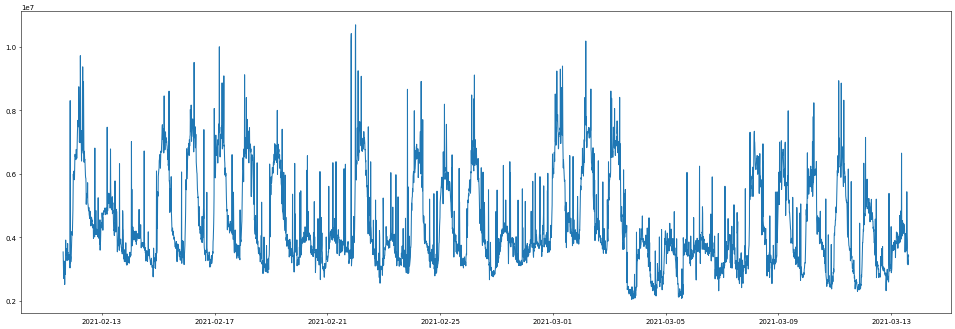

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(24, 8), dpi=50)
plt.plot(df['time'], df['counts'])

In [9]:
V = df['counts']
vals = np.expand_dims(V, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [10]:
np.bincount(hidden_states)

array([1274, 3046], dtype=int64)

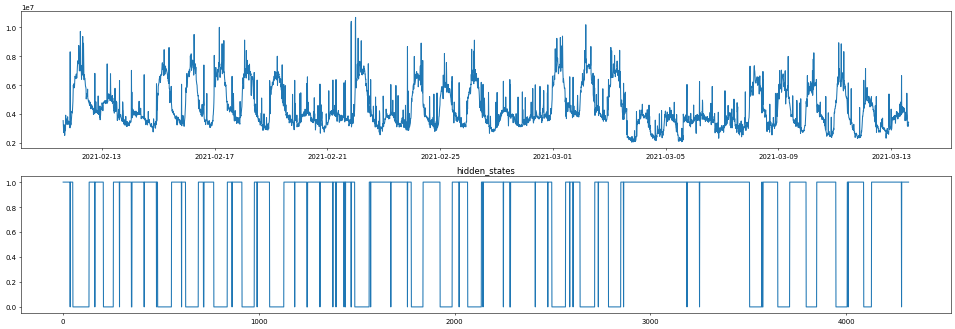

In [13]:
plt.figure(figsize=(24, 8), dpi=50)

plt.subplot(2, 1, 1)
plt.plot(df['time'], df['counts'])

plt.subplot(2, 1, 2)
plt.title("hidden_states")
plt.plot(hidden_states)

In [14]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [19]:
hidden_states, mus, sigmas, transmat, model = fitHMM(df.counts.values, 2)

[6259382.56374668 3614432.53370663]
[972906.1405534  606299.07755996]


In [56]:
def plot_states(ts_vals, states, time_vals):
    
    fig, ax1 = plt.subplots(figsize=(24.0, 8.0))
    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('traffic', color=color)
    ax1.plot(time_vals, ts_vals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.figure(figsize=(24, 8), dpi=50)
    plt.show()

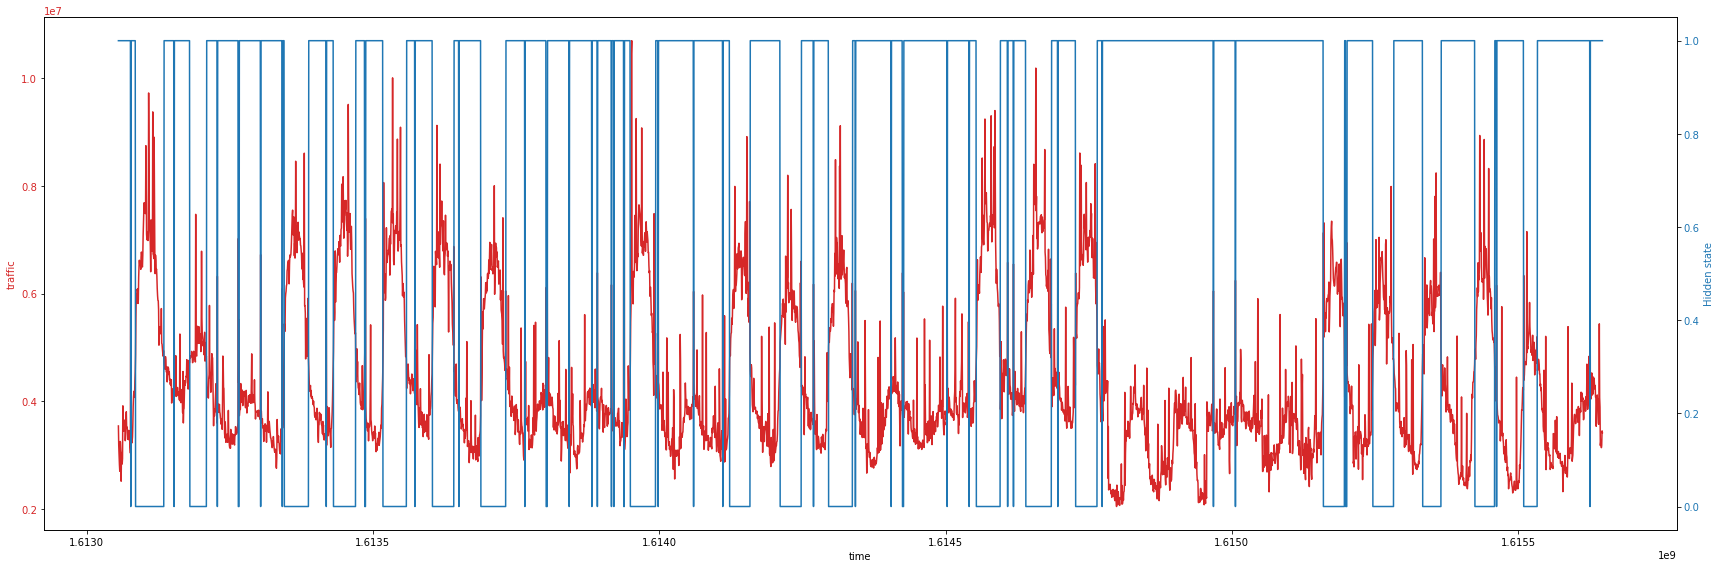

<Figure size 1200x400 with 0 Axes>

In [57]:
plot_states(df.counts.values, hidden_states, df2)

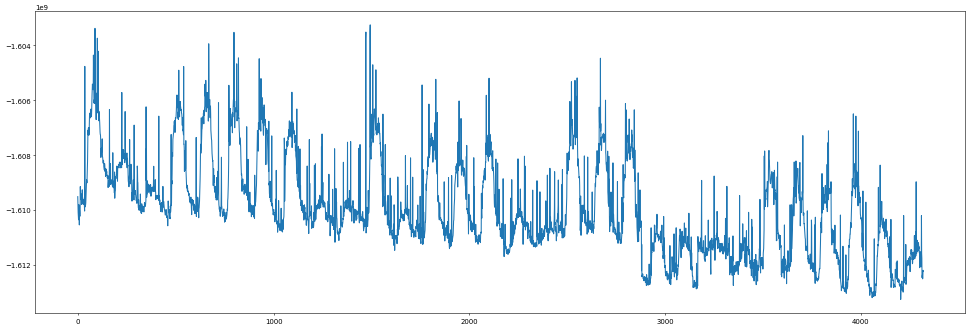

In [73]:
tmp = df.counts.values - df2
plt.figure(figsize=(24, 8), dpi=50)
plt.plot(tmp)

In [58]:
np.where(hidden_states == 0)

(array([  36,   50,   51, ..., 4128, 4129, 4283], dtype=int64),)

In [60]:
hidden_states, mus, sigmas, transmat, model = fitHMM(df.counts.values, 3)

[4013903.45733981 6474926.23734715 3299313.42683152]
[761475.17570908 866625.31559486 306367.30955597]


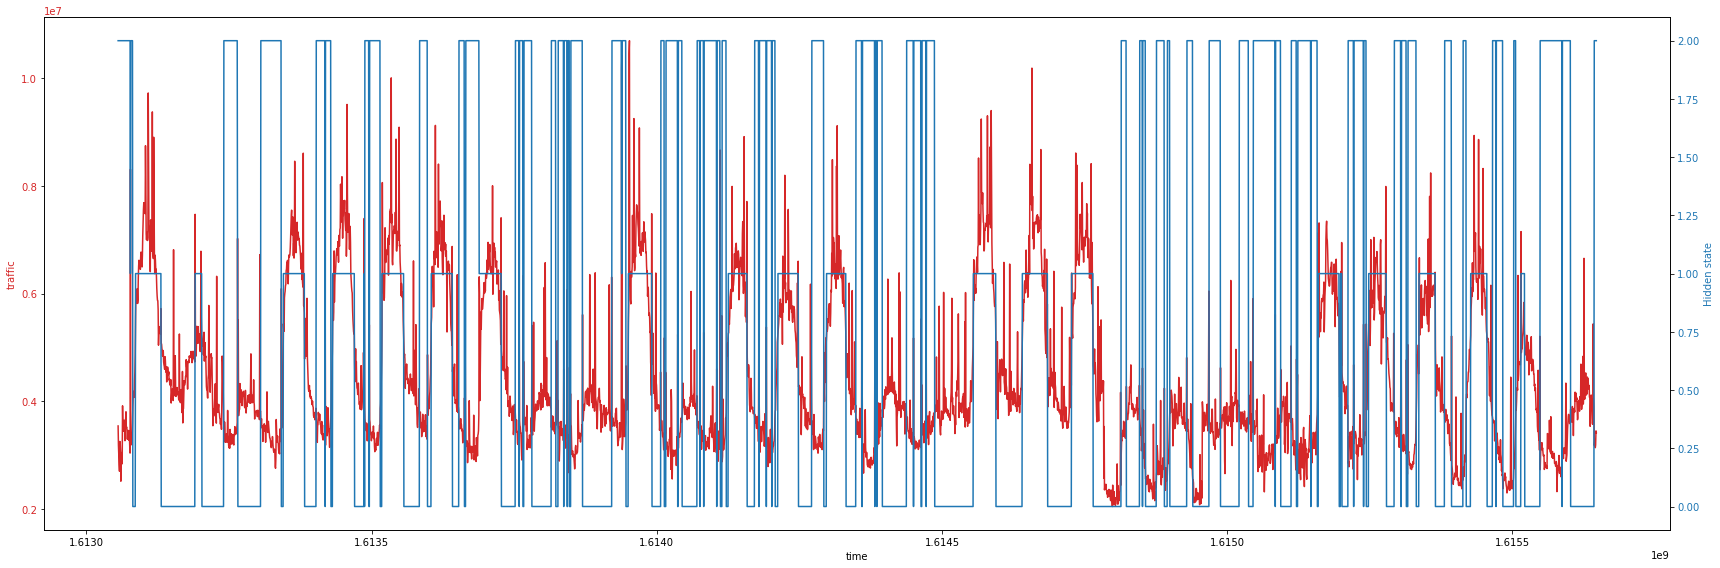

<Figure size 1200x400 with 0 Axes>

In [63]:
plot_states(df.counts.values, hidden_states, df2)

In [64]:
mus

array([4013903.45733981, 6474926.23734715, 3299313.42683152])

In [65]:
np.set_printoptions(precision = 3, suppress = True)

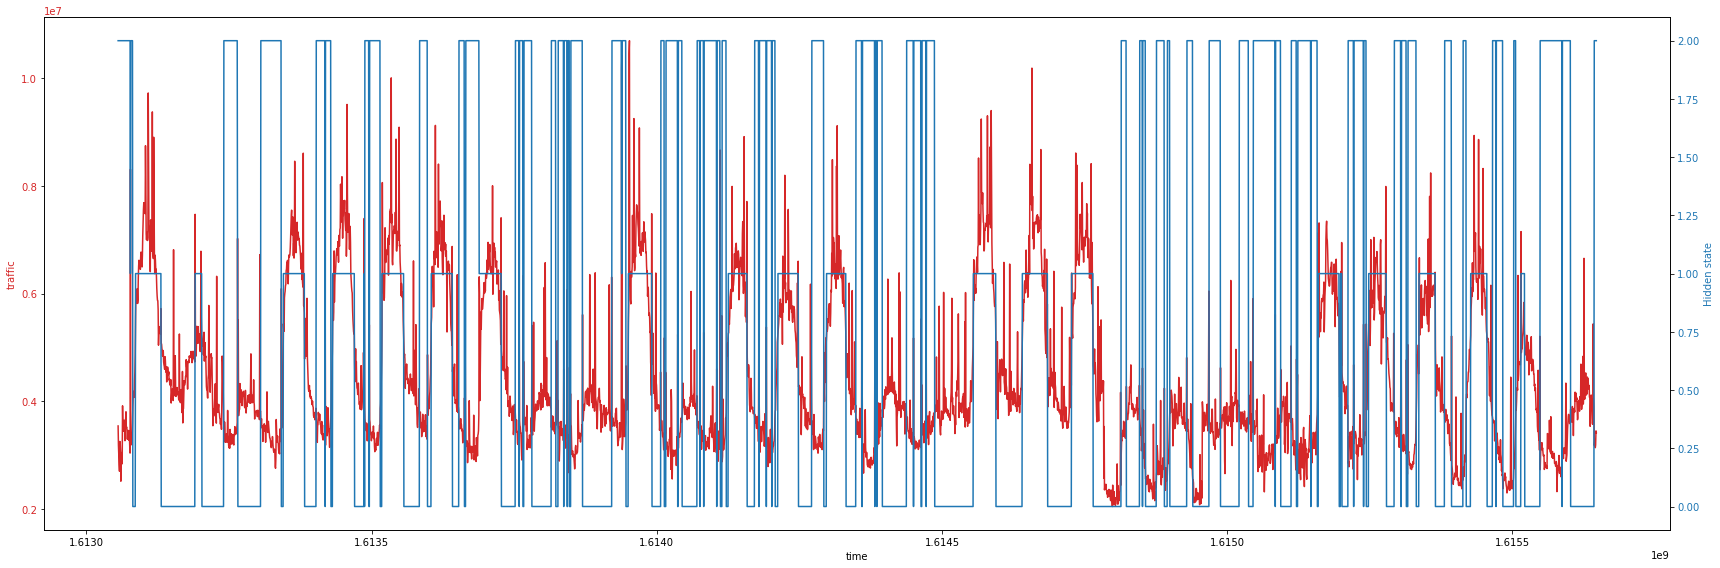

<Figure size 1200x400 with 0 Axes>

In [66]:
plot_states(df.counts.values, hidden_states, df2)